# 1. 라이브러리 설치

In [29]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore')

PATH = '/kaggle/input/daconbittrader/'

In [30]:
import gc
import math
import os.path
import time
from dateutil import parser
import copy

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet

# 2. 데이터 불러오기

## 1) read_csv

In [ ]:
train_x = pd.read_csv(PATH+"train_x_df.csv")
train_y = pd.read_csv(PATH+"train_y_df.csv")
test_x = pd.read_csv(PATH+"test_x_df.csv")

In [31]:
print(f"train_x shape: {train_x.shape}\ntrain_y shape: {train_y.shape}")
display(train_x)
display(train_y)
display(test_x)

train_x shape: (10159560, 12)
train_y shape: (883440, 12)


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10159555,7361,1375,8,1.000668,1.001669,1.000626,1.001502,9.180907e+00,2203.059082,2.245034,6.229020e+00,1494.727417
10159556,7361,1376,8,1.001627,1.001920,1.000960,1.001294,7.963097e+00,1911.151611,2.211651,3.056139e+00,733.490601
10159557,7361,1377,8,1.001294,1.001461,1.000584,1.000668,3.849893e+00,923.610718,1.260224,2.284546e+00,548.042297
10159558,7361,1378,8,1.000709,1.000751,1.000042,1.000042,1.337402e+00,320.624756,0.826239,5.164965e-01,123.819839


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844
...,...,...,...,...,...,...,...,...,...,...,...,...
883435,7361,115,8,1.007303,1.007845,1.007261,1.007720,2.843995e+00,686.734558,0.792856,1.373841e+00,331.730499
883436,7361,116,8,1.007678,1.008847,1.007678,1.008471,2.577599e+00,622.798462,0.884660,1.638966e+00,396.005463
883437,7361,117,8,1.008513,1.009014,1.008304,1.008805,4.579865e+00,1106.928345,1.210149,1.735705e+00,419.485596
883438,7361,118,8,1.008680,1.009222,1.008680,1.009222,1.065129e+00,257.542755,0.525789,4.348240e-01,105.134232


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.003541,1.007110,1.003541,1.006090,486928.968750,182543.687500,332.671570,287449.968750,107758.375000
1,0,1,7,1.006117,1.006331,1.004829,1.005634,824485.375000,309019.750000,407.790955,560290.250000,210005.125000
2,0,2,7,1.005929,1.005983,1.004266,1.005366,478614.562500,179301.843750,276.332031,214270.265625,80283.554688
3,0,3,7,1.005044,1.005956,1.004910,1.005795,334366.843750,125305.117188,166.335785,56401.246094,21135.490234
4,0,4,7,1.005580,1.006466,1.005285,1.005929,560916.687500,210316.796875,303.160370,138711.703125,52010.964844
...,...,...,...,...,...,...,...,...,...,...,...,...
730015,528,1375,5,1.001805,1.001805,0.998797,0.998797,583600.875000,77517.406250,473.898010,9092.824219,1210.823120
730016,528,1376,5,0.998571,1.001730,0.996690,1.001730,688827.312500,91420.523438,503.986786,289617.906250,38465.292969
730017,528,1377,5,0.999323,1.003009,0.997367,1.002934,417688.437500,55624.304688,353.542969,291073.437500,38773.152344
730018,528,1378,5,1.000903,1.000903,0.999774,0.999925,91273.515625,12139.500000,120.355049,0.000000,0.000000


## 2) numpy array로 변환하기

In [32]:
train_x.iloc[:,2:].shape

(10159560, 10)

In [33]:
def df2d_to_array3d(df_2d):
    feature_size = df_2d.iloc[:,2:].shape[1]
    # df_2d에서 3번째 컬럼부터 마지막컬럼 까지의 갯수
    # 즉, sample_id와 time을 제외한 모든 column의 갯수
    time_size = len(df_2d.time.value_counts())
    # 유니크한 time의 갯수
    sample_size = len(df_2d.sample_id.value_counts())
    # 유니크한 sample_id의 갯수
    sample_index = df_2d.sample_id.value_counts().index
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, 
                                                time_size, feature_size])
    return array_3d

In [34]:
train_x_array = df2d_to_array3d(train_x)
train_y_array = df2d_to_array3d(train_y)
test_x_array = df2d_to_array3d(test_x)

print(f'''
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')


train_x_array (7362, 1380, 10)
train_y_array (7362, 120, 10)
test_x_array (529, 1380, 10)



In [ ]:
print(train_x_array)
print(train_y_array)
print(test_x_array)

## 3) 샘플 확인하기

In [ ]:
def plot_series(x_series, y_series):
    # input series와 output series를 연속적으로 연결하여 시각화
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
            y_series, label='output_series')
    plt.axhline(1, c='red')
    # 이 선을 기준으로 내려갔는지 올라갔는지 판단할 수 있다.
    plt.legend()

In [ ]:
# sample_id 1012에 해당하는 sample의 분단위 open의 변동정보 시각화
idx = 1121
plot_series(train_x_array[idx,:,1], train_y_array[idx,:,1])
# idx는 지정했기때문에 고정
# time은 모두 선택
# 원하는 변동column 10개중에 open을 선택 (0은 coin_index이고 1이 open임)
plt.show()

# 3. 모델 훈련하기

## 1) train 샘플 훈련하기
- 한개의 샘플로 분석흐름 파악하기

In [ ]:
# 모델에 데이터를 넣기위해서 형식을 맞춰줘야함
start_time = "2021-01-31 00:00:00"
start_dt = dt.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
print(start_dt)

In [ ]:
idx = 1121
# train data 중 sample_id 1121에 해당하는 x_series로 arima 모델을 학습한 후
# y_series를 추론
x_series = train_x_array[idx,:,1]
y_series = train_y_array[idx,:,1]
# 위에서와 마찬가지로
# idx 고정
# time 모두선택
# 10개 columns 중에서 2번째 column(open)을 선택

In [ ]:
x_df = pd.DataFrame()
x_df['ds'] = [start_dt + dt.timedelta(minutes=time_min) for time_min in np.arange(1, x_series.shape[0]+1).tolist()]
# x_train에 있던 time column의 int값을 datetime 형태로 바꿔줌
x_df['y'] = x_series.tolist() # open가격을 y column에 넣는다

display(x_df)

In [35]:
# ARIMA 모형을 사용하지만 라이브러리는 페북에서 만든 fbprophet을 사용
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=False,
                 weekly_seasonality=False,
                 daily_seasonality=False)
#prophet.fit(x_df)

In [ ]:
# 120분 테스트 데이터를 예측
future_data = prophet.make_future_dataframe(periods=120, freq='min')
# 일단 틀을 만들고
forecast_data = prophet.predict(future_data)
# 그 틀에 해당하는 예측값을 찍어낸다.
# 여기서 prophet.predict()함수는 예측값, 예측값최대최소 를 포함한
# 13개의 column을 만들어낸다.
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
# 따라서 분석에 필요한 column만 뽑아낸다.

In [ ]:
#만들어진 데이터를 확인
fig1 = prophet.plot(forecast_data)

In [ ]:
# 데이터의 추세를 확인
fig2 = prophet.plot_components(forecast_data)

In [ ]:
pred_y = forecast_data.yhat.values[-120:] #예측값의 이후 120
pred_y_lower = forecast_data.yhat_lower.values[-120:] #예측최소의 이후 120
pred_y_upper = forecast_data.yhat_upper.values[-120:] #예측최대의 이후 120

plot_series(x_series, y_series) # 기존의 학습데이터
plt.plot(np.arange(1380, 1380+120), pred_y, label = 'prediction')
plt.plot(np.arange(1380, 1380+120), pred_y_lower, label = 'prediction_lower')
plt.plot(np.arange(1380, 1380+120), pred_y_upper, label = 'prediction_upper')
# 23시간 이후 120분의 예측,예측최소,예측최대의 그래프
plt.legend()
plt.show()

## 1)-1 Train set 훈련하기
- 각 샘플은 연관성이 없고 모두 랜덤한 경우라고 가정
- train set의 sample_id는 총 7362개
- train set을 train과 validation으로 나눈다
- train set: 6000개 (id 0 ~ 5999)
- validation set: 1362개(id 6000 ~ 7361)

### <1> train set 생성하기

In [132]:
train_x_df = train_x[train_x.sample_id < 6000]
train_y_df = train_y[train_y.sample_id < 6000]
display(train_x_df)

train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
#train_pred_array = np.zeros([6000, 120])


,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8279995,5999,1375,5,1.000760,1.000760,1.000760,1.000760,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
8279996,5999,1376,5,1.000000,1.000000,0.995063,0.995063,5.974744e+05,15677.087891,151.917969,1.585454e+05,4174.500000
8279997,5999,1377,5,1.001899,1.002279,1.001519,1.002279,4.436384e+05,11703.086914,151.917969,4.436384e+05,11703.086914
8279998,5999,1378,5,0.995443,0.995443,0.995443,0.995443,4.325484e+05,11337.093750,113.938477,0.000000e+00,0.000000


### <2> 학습 및 추론(predict yhat)하기

In [ ]:
'''
start_time = "2021-01-31 00:00:00"
start_dt = dt.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')

for idx in tqdm(range(train_x_array.shape[0])):
    try:
        x_series = train_x_array[idx,:,1]

        x_df = pd.DataFrame()
        x_df['ds'] = [start_dt + dt.timedelta(minutes=time_min) for time_min in np.arange(1,x_series.shape[0]+1).tolist()]
        x_df['y'] = x_series.tolist()

        prophet = Prophet(seasonality_mode = 'multiplicative',
                         yearly_seasonality=False,
                         weekly_seasonality=False,
                         daily_seasonality=False)
        prophet.fit(x_df)

        # 120분 테스트 데이터를 예측
        future_data = prophet.make_future_dataframe(periods=120, freq='min')
        forecast_data = prophet.predict(future_data)

        pred_y = forecast_data.yhat.values[-120:]
        #pred_y_lower = forecast_data.yhat_lower.values[-120:]
        #pred_y_upper = forecast_data.yhat_upper.values[-120:]

        train_pred_array[idx,:] = pred_y
        
    except:
        print(idx, "샘플은 수렴하지 않습니다.")
        pass
'''

- csv파일로 저장

In [140]:
# 추론한 yhat을 저장
#pd.DataFrame(train_pred_array).to_csv("train_pred_array0322.csv", index=False)
train_pred_array = pd.read_csv(PATH+"train_pred_array0322.csv")

In [141]:
train_pred_array = np.array(train_pred_array)
train_pred_array.shape

(6000, 120)

### <3> train_pred_array로 buy_price와 sell_time을 구하기

In [155]:
def array_to_submission(x_array, pred_array):
    # input x_array와 ouput pred_array를 통해서
    # buy_quality와 sell_time을 결정
    submission = pd.DataFrame(np.zeros([pred_array.shape[0],2], np.int64),
                             columns=['buy_quantity', 'sell_time'])
    # 제출파일의 형식에 맞춰 비어있는 DataFrame 생성
    submission = submission.reset_index() # 인덱스 리셋
    submission.loc[:, 'buy_quantity'] = 0.1 # buy_quantity column 모두 0.1로
    
    buy_price = []
    for idx, sell_time in enumerate(np.argmax(pred_array, axis=1)):
        # pred_arry에서 가장 큰 open price의 time을 반환
        buy_price.append(pred_array[idx, sell_time])
    buy_price = np.array(buy_price)
    
    # 112% 이상 상승한다고 예측한 sample에 대해서만 50% 매수
    # 조건식이 True면 1, False면 0을 반환하고 그 값에 * 1 연산을 하는 것!!!
    submission.loc[:, 'buy_quantity'] = (buy_price >1.12) * 0.5
   
    # 모델이 예측값 중 최대값에 해당하는 시간에 매도
    submission["sell_time"] = np.argmax(pred_array, axis=1)
    submission.columns = ['sample_id', 'buy_quantity', 'sell_time']
    return submission

In [150]:
'''
a = np.array([1.05, 1.06, 1.10])
practice = pd.DataFrame([[0.1, 0],
                        [0.1, 0],
                        [0.1, 0]], columns=['buy_quantity', 'sell_time'])
practice.loc[:, 'buy_quantity'] = (a > 1.06) * 2

practice
'''

"\na = np.array([1.05, 1.06, 1.10])\npractice = pd.DataFrame([[0.1, 0],\n                        [0.1, 0],\n                        [0.1, 0]], columns=['buy_quantity', 'sell_time'])\npractice.loc[:, 'buy_quantity'] = (a > 1.06) * 2\n\npractice\n"

In [156]:
train_submission = array_to_submission(train_x_array, train_pred_array)
#display(train_submission)
train_submission.buy_quantity.value_counts()

0.0    5996
0.5       4
Name: buy_quantity, dtype: int64

### <4> 투자후 금액 계산하기

In [143]:
def df2d_to_answer(df_2d):

    #valid_y_df로 부터 open 가격정보가 포함된
    # [샘플수, 120분]크기의 2차원 array를 반환하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_2d = df_2d.open.values.reshape([sample_size, time_size])
    sample_index = list(sample_index)
    return array_2d, sample_index

def COIN(y_df, submission, train_len, df2d_to_answer=df2d_to_answer):
    # 2차원 dataFrame에서 open 시점 데이터만 추출하여 array로 복원
    # sample_id 정보를 index에 저장
    y_array, index = df2d_to_answer(y_df)
    index = [(x - train_len) for x in index]
    
    # index 기준으로 submisssion을 다시 선택
    submission = submission.set_index(submission.columns[0])
    submission = submission.iloc[index, :]
    
    # 초기 투자비용은 10000달러
    total_money = 10000
    total_money_list = []
    
    # 가장 처음 sample_id 값
    start_index = submission.index[0]
    for row_idx in submission.index:
        sell_time = submission.loc[row_idx, 'sell_time']
        buy_price = y_array[row_idx-start_index, 0]
        sell_price = y_array[row_idx-start_index, sell_time]
        buy_quantity = submission.loc[row_idx, 'buy_quantity'] * total_money
        residual = total_money - buy_quantity
        ratio = sell_price / buy_price
        total_money = buy_quantity * ratio * 0.9995 * 0.9995 + residual
        total_money_list.append(total_money)
    return total_money,total_money_list

In [157]:
total_money,total_money_list = COIN(train_y_df,
                                   train_submission, 0)

In [158]:
#투자 후 금액
print(total_money)

9253.050659053268


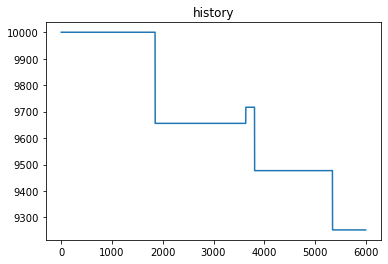

In [159]:
# 투자 히스토리
plt.plot(total_money_list)
plt.title("history")
plt.show()

## 2) validation set 훈련하기

### <1> validation 데이터 생성하기

In [50]:
# train 데이터 상단의 300개 샘플로 validation set를 구성하여 학습 및 추론
valid_x_df = train_x[train_x.sample_id >= 6000]
valid_y_df = train_y[train_y.sample_id >= 6000]
display(valid_x_df)

valid_x_array = df2d_to_array3d(valid_x_df)
valid_y_array = df2d_to_array3d(valid_y_df)
valid_pred_array = np.zeros([1362, 120])

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
8280000,6000,0,4,0.951833,0.951896,0.950684,0.951035,129979.585938,38760.449219,197.773453,28935.849609,8630.433594
8280001,6000,1,4,0.950652,0.951258,0.950652,0.951003,19552.138672,5828.695801,73.367569,10548.023438,3144.732666
8280002,6000,2,4,0.951195,0.951354,0.950620,0.951163,69304.281250,20657.771484,121.215988,14143.353516,4217.245117
8280003,6000,3,4,0.951227,0.951227,0.950620,0.950620,221794.296875,66099.187500,197.773453,57198.632812,17046.929688
8280004,6000,4,4,0.950748,0.951673,0.950620,0.951673,72137.546875,21509.298828,137.165451,50651.375000,15104.198242
...,...,...,...,...,...,...,...,...,...,...,...,...
10159555,7361,1375,8,1.000668,1.001669,1.000626,1.001502,9.180907,2203.059082,2.245034,6.229020,1494.727417
10159556,7361,1376,8,1.001627,1.001920,1.000960,1.001294,7.963097,1911.151611,2.211651,3.056139,733.490601
10159557,7361,1377,8,1.001294,1.001461,1.000584,1.000668,3.849893,923.610718,1.260224,2.284546,548.042297
10159558,7361,1378,8,1.000709,1.000751,1.000042,1.000042,1.337402,320.624756,0.826239,0.516497,123.819839


In [60]:
display(valid_y_df)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
720000,6000,0,4,0.999107,0.999362,0.998054,0.998437,213340.140625,66779.421875,181.823975,43519.730469,13621.182617
720001,6000,1,4,0.998628,0.998756,0.997831,0.998405,172419.531250,53947.699219,207.343140,25338.925781,7929.491211
720002,6000,2,4,0.998437,0.998660,0.997990,0.997990,74570.164062,23339.968750,140.355347,49479.089844,15487.922852
720003,6000,3,4,0.997958,0.998309,0.996714,0.997225,235719.484375,73720.335938,299.850067,13381.288086,4185.063477
720004,6000,4,4,0.996714,0.998246,0.996619,0.997767,232109.796875,72555.382812,252.001663,141902.781250,44360.582031
...,...,...,...,...,...,...,...,...,...,...,...,...
883435,7361,115,8,1.007303,1.007845,1.007261,1.007720,2.843995,686.734558,0.792856,1.373841,331.730499
883436,7361,116,8,1.007678,1.008847,1.007678,1.008471,2.577599,622.798462,0.884660,1.638966,396.005463
883437,7361,117,8,1.008513,1.009014,1.008304,1.008805,4.579865,1106.928345,1.210149,1.735705,419.485596
883438,7361,118,8,1.008680,1.009222,1.008680,1.009222,1.065129,257.542755,0.525789,0.434824,105.134232


### <2> 학습 및 추론하기

In [ ]:
'''
start_time = "2021-01-31 00:00:00"
start_dt = dt.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')

for idx in tqdm(range(valid_x_array.shape[0])):
    try:
        x_series = valid_x_array[idx,:,1]

        x_df = pd.DataFrame()
        x_df['ds'] = [start_dt + dt.timedelta(minutes=time_min) for time_min in np.arange(1,x_series.shape[0]+1).tolist()]
        x_df['y'] = x_series.tolist()

        prophet = Prophet(seasonality_mode = 'multiplicative',
                         yearly_seasonality=False,
                         weekly_seasonality=False,
                         daily_seasonality=False)
        prophet.fit(x_df)

        # 120분 테스트 데이터를 예측
        future_data = prophet.make_future_dataframe(periods=120, freq='min')
        forecast_data = prophet.predict(future_data)

        pred_y = forecast_data.yhat.values[-120:]
        #pred_y_lower = forecast_data.yhat_lower.values[-120:]
        #pred_y_upper = forecast_data.yhat_upper.values[-120:]

        valid_pred_array[idx,:] = pred_y
        
    except:
        print(idx, "샘플은 수렴하지 않습니다.")
        pass
'''

In [54]:
#pd.DataFrame(valid_pred_array).to_csv("valid_pred_array0322.csv", index=False)
valid_pred_array = pd.read_csv(PATH+"valid_pred_array0322.csv")
valid_pred_array = np.array(valid_pred_array)
print(valid_pred_array)

[[0.99488494 0.99487911 0.99487328 ... 0.99420279 0.99419695 0.99419112]
 [1.00380063 1.00377052 1.00374041 ... 1.00027805 1.00024794 1.00021783]
 [0.99845436 0.99841129 0.99836821 ... 0.99341437 0.99337129 0.99332821]
 ...
 [1.005454   1.00543543 1.00541686 ... 1.00328133 1.00326276 1.00324419]
 [0.9940183  0.99391468 0.99381107 ... 0.98189499 0.98179137 0.98168776]
 [0.99793557 0.99794953 0.99796349 ... 0.99956876 0.99958271 0.99959667]]


### <3> valid_pred_array로부터 buy_quality, sell_time 구하기

In [160]:
valid_submission = array_to_submission(valid_x_array, valid_pred_array)

In [161]:
valid_submission.buy_quantity.value_counts()

0.0    1360
0.5       2
Name: buy_quantity, dtype: int64

In [92]:
valid_submission

,sample_id,buy_quantity,sell_time
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,119
4,4,0,0
...,...,...,...
1357,1357,0,119
1358,1358,0,119
1359,1359,0,0
1360,1360,0,0


### <4> 투자 후 금액 계산하기

In [82]:
def df2d_to_answer(df_2d):
    #valid_y_df로 부터 open 가격정보가 포함된
    # [샘플수, 120분]크기의 2차원 array를 반환하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_2d = df_2d.open.values.reshape([sample_size, time_size])
    sample_index = list(sample_index)
    return array_2d, sample_index

def COIN(y_df, submission, train_len, df2d_to_answer=df2d_to_answer):
    # 2차원 dataFrame에서 open 시점 데이터만 추출하여 array로 복원
    # sample_id 정보를 index에 저장
    y_array, index = df2d_to_answer(y_df)
    index = [(x - train_len) for x in index]
    
    # index 기준으로 submisssion을 다시 선택
    submission = submission.set_index(submission.columns[0])
    submission = submission.iloc[index, :]
    
    # 초기 투자비용은 10000달러
    total_money = 10000
    total_money_list = []
    
    # 가장 처음 sample_id 값
    start_index = submission.index[0]
    for row_idx in submission.index:
        sell_time = submission.loc[row_idx, 'sell_time']
        buy_price = y_array[row_idx-start_index, 0]
        sell_price = y_array[row_idx-start_index, sell_time]
        buy_quantity = submission.loc[row_idx, 'buy_quantity'] * total_money
        residual = total_money - buy_quantity
        ratio = sell_price / buy_price
        total_money = buy_quantity * ratio * 0.9995 * 0.9995 + residual
        total_money_list.append(total_money)
    return total_money,total_money_list


In [162]:
total_money,total_money_list = COIN(valid_y_df,
                                   valid_submission, 6000)

In [163]:
#투자 후 금액
print(total_money)

9636.684407575405


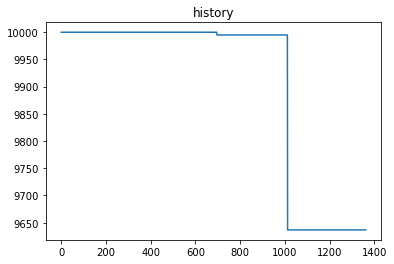

In [164]:
# 투자 히스토리
plt.plot(total_money_list)
plt.title("history")
plt.show()

# 4. Test 데이터 학습하고 추론하기

In [ ]:
test_pred_array = np.zeros([test_x_array.shape[0],
                           120])
for idx in tqdm(range(test_x_array.shape[0])):
    try:
        x_series = test_x_array[idx,:,1]

        x_df = pd.DataFrame()
        x_df['ds'] = [start_dt + dt.timedelta(minutes = time_min) for time_min in np.arange(1, x_series.shape[0]+1).tolist()]
        x_df['y'] = x_series.tolist()

        prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=False,
                  weekly_seasonality=False, daily_seasonality=False)
        prophet.fit(x_df)

        # 120분 테스트 데이터를 예측합니다.
        future_data = prophet.make_future_dataframe(periods=120, freq='min')
        forecast_data = prophet.predict(future_data)

        pred_y = forecast_data.yhat.values[-120:]
        pred_y_lower = forecast_data.yhat_lower.values[-120:]
        pred_y_upper = forecast_data.yhat_upper.values[-120:]

        test_pred_array[idx,:] = pred_y
    except:
        print(idx, " 샘플은 수렴하지 않습니다.")
        pass

In [ ]:
pd.DataFrame(test_pred_array).to_csv("test_pred_array0322.csv", index=False)

In [ ]:
submission = array_to_submission(test_x_array, test_pred_array)

In [ ]:
submission.buy_quantity.value_counts()

In [ ]:
submission.to_csv("baseline_submission_proh0322.csv", index = False)